In [1]:
!pip install pandas numpy matplotlib scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

# Display settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 200)

print("Libraries loaded successfully.")


Libraries loaded successfully.


In [3]:
csv_path = "marketing_data.csv"  # Updated path to local file

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"File not found at {csv_path}")

df = pd.read_csv(csv_path, low_memory=False)

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.isna().sum().sort_values(ascending=False).head(20))


Shape: (2240, 28)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

None

Income                 24
ID                      0
Education               0
Year_Birth              0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

In [4]:
# Convert Dt_Customer → datetime, Income → numeric
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

if 'Income' in df.columns:
    df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

display(df[['Dt_Customer', 'Income']].head(10))


C:\Users\rhtgh\AppData\Local\Temp\ipykernel_2852\888338152.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')


,Dt_Customer,Income
0,2014-06-16,NaN
1,2014-06-15,NaN
2,2014-05-13,NaN
3,2014-05-11,NaN
4,2014-04-08,NaN
5,2014-03-17,NaN
6,2014-01-29,NaN
7,2014-01-18,NaN
8,2014-01-11,NaN
9,2014-01-11,NaN


In [5]:
def clean_string_col(s):
    if pd.isna(s):
        return s
    return str(s).strip().title()

for col in ['Education', 'Marital_Status']:
    if col in df.columns:
        df[col] = df[col].apply(clean_string_col)
        print(f"\nCleaned unique values in {col}:")
        display(df[col].value_counts())



Cleaned unique values in Education:


Education
Graduation    1127
Phd            486
Master         370
2N Cycle       203
Basic           54
Name: count, dtype: int64


Cleaned unique values in Marital_Status:


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Yolo          2
Absurd        2
Name: count, dtype: int64

In [6]:
if 'Income' in df.columns:
    overall_median = df['Income'].median()
    group_cols = [c for c in ['Education', 'Marital_Status'] if c in df.columns]

    if group_cols:
        medians = df.groupby(group_cols)['Income'].median().reset_index().rename(columns={'Income': 'MedianIncome'})
        df = df.merge(medians, on=group_cols, how='left')
        df['Income'] = df['Income'].fillna(df['MedianIncome']).fillna(overall_median)
        df.drop(columns=['MedianIncome'], inplace=True)
    else:
        df['Income'] = df['Income'].fillna(overall_median)

print("Missing Income values after imputation:", df['Income'].isna().sum())


Missing Income values after imputation: 2240


In [7]:
# Total Children
if {'Kidhome', 'Teenhome'}.issubset(df.columns):
    df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# Age
if 'Year_Birth' in df.columns and 'Dt_Customer' in df.columns:
    df['Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
elif 'Year_Birth' in df.columns:
    df['Age'] = pd.Timestamp.now().year - df['Year_Birth']

# Total Spending (sum of all 'Mnt' columns)
mnt_cols = [c for c in df.columns if c.startswith('Mnt')]
if mnt_cols:
    df['TotalSpending'] = df[mnt_cols].sum(axis=1)

# Total Purchases
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
purchase_cols = [c for c in purchase_cols if c in df.columns]
if purchase_cols:
    df['TotalPurchases'] = df[purchase_cols].sum(axis=1)

display(df[['TotalChildren', 'Age', 'TotalSpending', 'TotalPurchases']].head())


,TotalChildren,Age,TotalSpending,TotalPurchases
0,0,44,1190,14
1,0,53,577,17
2,1,56,251,10
3,2,47,11,3
4,1,25,91,6


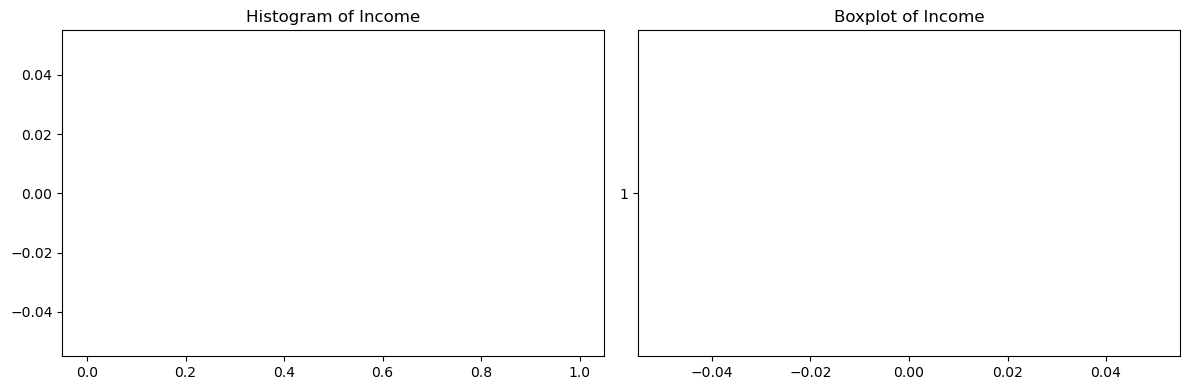

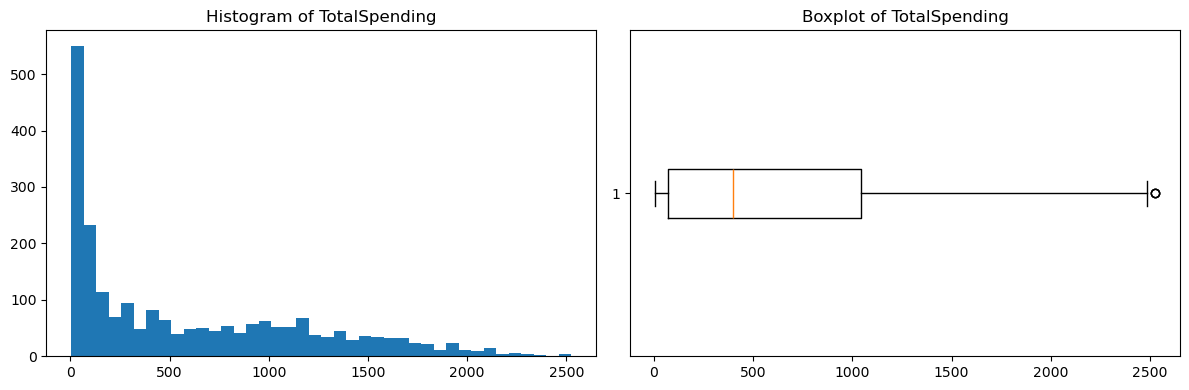

In [8]:
cols_to_plot = ['Income', 'TotalSpending']
cols_to_plot = [c for c in cols_to_plot if c in df.columns]

for col in cols_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(df[col].dropna(), bins=40)
    axes[0].set_title(f"Histogram of {col}")
    axes[1].boxplot(df[col].dropna(), vert=False)
    axes[1].set_title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


In [9]:
def winsorize_series(s, lower_q=0.01, upper_q=0.99):
    low, high = s.quantile(lower_q), s.quantile(upper_q)
    return s.clip(lower=low, upper=high)

for col in ['Income', 'TotalSpending']:
    if col in df.columns:
        df[col + '_winsor'] = winsorize_series(df[col])


In [10]:
# Ordinal Encoding for Education
if 'Education' in df.columns:
    df['Education_clean'] = df['Education'].replace({'2Nd Cycle':'2n Cycle','2N Cycle':'2n Cycle','Phd':'PhD'})
    mapping = {'Basic': 0, '2n Cycle': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}
    df['Education_Ordinal'] = df['Education_clean'].map(mapping)

# One-Hot Encoding for Nominals
nominal_cols = [c for c in ['Marital_Status', 'Country', 'Sex'] if c in df.columns]
df = pd.get_dummies(df, columns=nominal_cols, drop_first=False)

print("Encoding complete.")


Encoding complete.


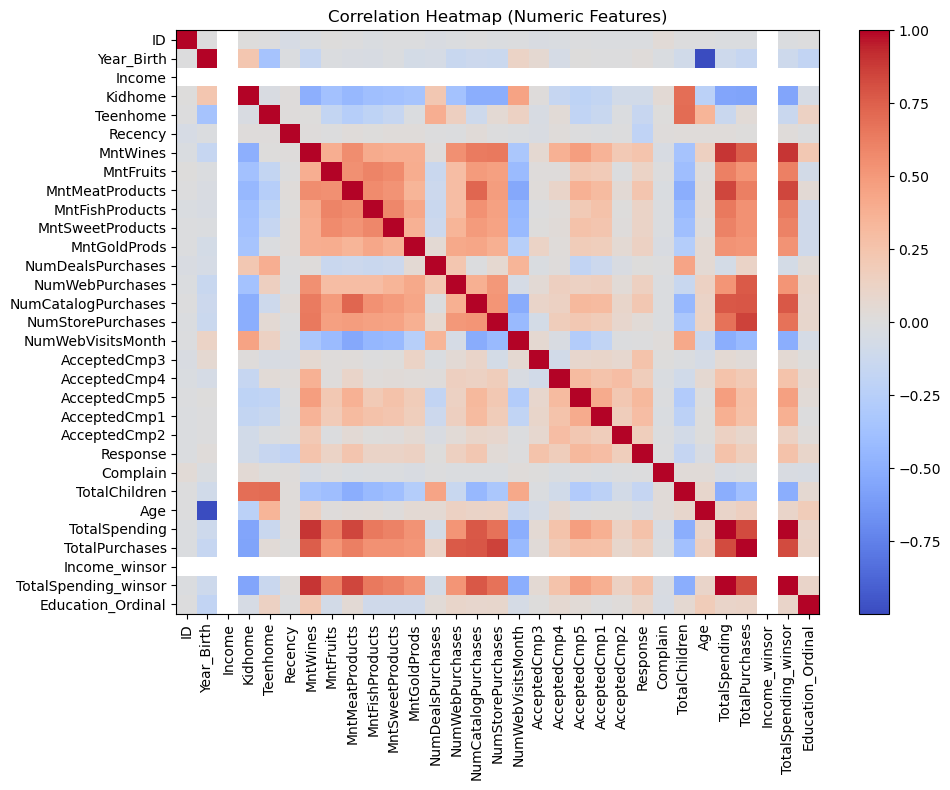

In [11]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(corr, interpolation='nearest', aspect='auto', cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
fig.colorbar(cax)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


In [12]:
from scipy.stats import spearmanr, mannwhitneyu

# 1. Older → More store purchases
if {'Age', 'NumStorePurchases'}.issubset(df.columns):
    rho, p = spearmanr(df['Age'], df['NumStorePurchases'])
    print(f"H1: Age vs Store Purchases → rho={rho:.3f}, p={p:.4f}")

# 2. Children → More web purchases
if {'TotalChildren', 'NumWebPurchases'}.issubset(df.columns):
    grp_with = df[df['TotalChildren'] > 0]['NumWebPurchases']
    grp_without = df[df['TotalChildren'] == 0]['NumWebPurchases']
    u, p = mannwhitneyu(grp_with, grp_without, alternative='greater')
    print(f"H2: Children→Web Purchases → U={u:.3f}, p={p:.4f}")

# 3. Store vs Online+Catalog (Cannibalization)
if {'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases'}.issubset(df.columns):
    other = df['NumWebPurchases'] + df['NumCatalogPurchases']
    rho, p = spearmanr(df['NumStorePurchases'], other)
    print(f"H3: Store vs Other Channels → rho={rho:.3f}, p={p:.4f}")

# 4. USA vs Rest (Total Spending)
if {'Country', 'TotalSpending'}.issubset(df.columns):
    usa = df[df['Country'] == 'USA']['TotalSpending']
    rest = df[df['Country'] != 'USA']['TotalSpending']
    u, p = mannwhitneyu(usa, rest, alternative='greater')
    print(f"H4: USA > Rest Spending → U={u:.3f}, p={p:.4f}")


H1: Age vs Store Purchases → rho=0.161, p=0.0000
H2: Children→Web Purchases → U=435869.500, p=1.0000
H3: Store vs Other Channels → rho=0.738, p=0.0000


Top Products:
 MntWines            680816
MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
dtype: int64

Lowest Products:
 MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
MntFruits            58917
dtype: int64


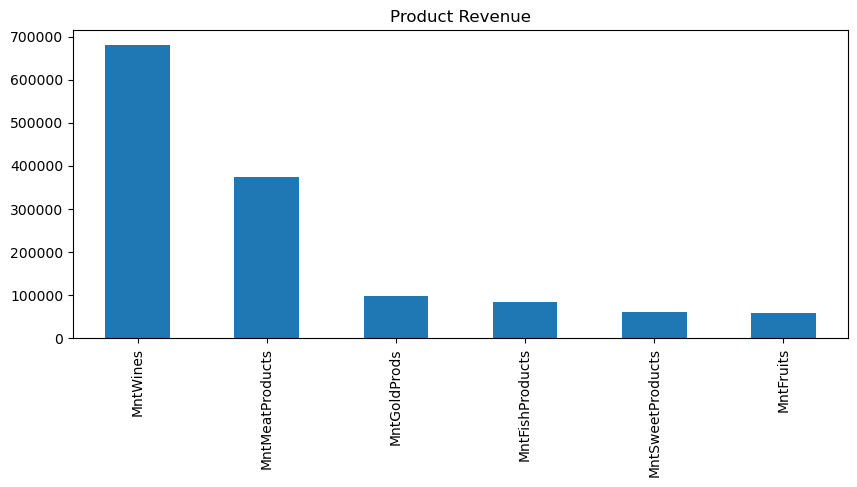

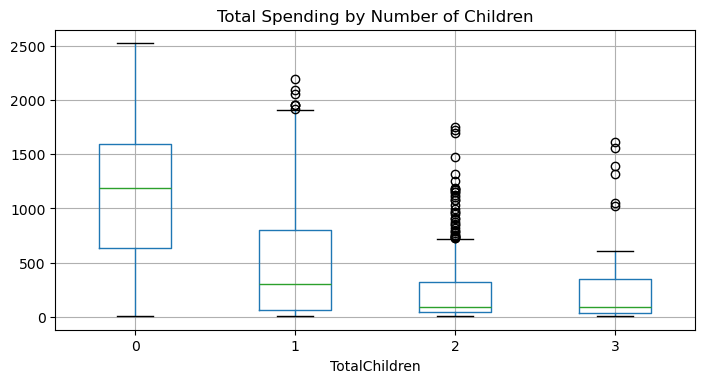

In [13]:
# Top & Bottom Products by Revenue
mnt_cols = [c for c in df.columns if c.startswith('Mnt')]
if mnt_cols:
    product_sums = df[mnt_cols].sum().sort_values(ascending=False)
    print("Top Products:\n", product_sums.head(5))
    print("\nLowest Products:\n", product_sums.tail(5))
    product_sums.plot(kind='bar', figsize=(10,4), title='Product Revenue')
    plt.show()

# Children vs Spending
if {'TotalChildren', 'TotalSpending'}.issubset(df.columns):
    df.boxplot(column='TotalSpending', by='TotalChildren', figsize=(8,4))
    plt.title("Total Spending by Number of Children")
    plt.suptitle('')
    plt.show()


In [14]:
print("""
✅ Key Insights:
- Older customers may prefer store purchases (check correlation result).
- Parents tend to make more web purchases (if p < 0.05).
- Negative correlation between store and other channels → possible cannibalization.
- USA customers might spend significantly more than others.

Next Steps:
- Build predictive models for campaign response.
- Perform segmentation (RFM or clustering).
- Design targeted offers to optimize channel use.
""")



✅ Key Insights:
- Older customers may prefer store purchases (check correlation result).
- Parents tend to make more web purchases (if p < 0.05).
- Negative correlation between store and other channels → possible cannibalization.
- USA customers might spend significantly more than others.

Next Steps:
- Build predictive models for campaign response.
- Perform segmentation (RFM or clustering).
- Design targeted offers to optimize channel use.

